In [249]:
import sys
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('jupyterlab')

%matplotlib inline
path_prefix = "/project/jevans/jamshid/mag/"

import json

In [59]:
# bio_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/biology/MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
phys_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/physics/MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# ee_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/electrical_engineering//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# chem_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/chemistry//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# cs_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/computer_science//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# econ_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/economics//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# matsci_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/materials_science//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# math_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/math//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# psych_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/psychology//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
soc_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/sociology//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)

# cultural background -- Journal Publisher

### getting info

In [3]:
journals = pd.read_csv('/project/jevans/MAG_Dec_2021_snapshot/mag/Journals.txt', sep='\t', header=None, usecols=[0,2,3,5,7])
journals.columns = ["jid","norm_name","display_name","publisher","pcount"]

In [4]:
# journals

In [28]:
# physics_jid = journals.loc[[x for x in journals.index if journals.norm_name[x].__contains__('physic')\
#                             and not journals.norm_name[x].__contains__('physical')\
#                             and not journals.norm_name[x].__contains__('physician')]]
# *! physic includes physicians & medical physics, physics excludes physical , ..
topic_jid = journals.loc[[x for x in journals.index if journals.norm_name[x].__contains__('physics')]]

In [29]:
america_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('america')])
japan_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('japan')])
china_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('chine')])
europe_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('euro')])
britain_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('brit')])
iran_jid = set([topic_jid.jid[x] for x in topic_jid.index if topic_jid.norm_name[x].__contains__('iran')])

In [7]:
# pjid = pd.read_csv('pjid.csv')

/software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
america_pid, japan_pid, china_pid, europe_pid, britain_pid, iran_pid = [],[],[],[],[],[]
for x in pjid.index:
    xjid,xpid = pjid.jid[x],pjid.pid[x]
    if xjid in america_jid:
        america_pid.append(xpid)
    elif xjid in japan_jid:
        japan_pid.append(xpid)
    elif xjid in china_jid:
        china_pid.append(xpid)
    elif xjid in europe_jid:
        europe_pid.append(xpid)
    elif xjid in britain_jid:
        britain_pid.append(xpid)
    elif xjid in iran_jid:
        iran_pid.append(xpid)

In [21]:
topic_loc_pids['america'][0]

2144637206

In [31]:
topic_loc_pids = {}
for loc in ["america","japan","china","europe","britain","iran"]:
    loc_pids = list(map(int, locals()[loc+"_pid"]))
    topic_loc_pids[loc] = loc_pids

In [32]:
json.dump(topic_loc_pids, open("phys_loc_pids.json","w"), indent=4)

### merging location w uncertainty df

In [51]:
with open('soc_loc_pids.json','r') as file:
    loc_pids = json.load(file)
for c in loc_pids:
    loc_pids[c] = set(loc_pids[c])

In [52]:
locs, pids = [],[]
for loc in loc_pids:
    for p in loc_pids[loc]:
        locs.append(loc)
        pids.append(p)
loc_df = pd.DataFrame()
loc_df['pid'] = pids
loc_df['location'] = locs
loc_df = loc_df.set_index('pid')

In [49]:
phys_uncertain_wloc = pd.merge(loc_df,phys_fin_wyear,how='left',left_index=True,right_index=True).dropna()
phys_uncertain_wloc.to_csv('phys_uncertain_wloc.csv')

In [60]:
soc_uncertain_wloc = pd.merge(loc_df,soc_fin_wyear,how='left',left_index=True,right_index=True).dropna()
soc_uncertain_wloc.to_csv('soc_uncertain_wloc.csv')

### analyzing data

In [61]:
phys_uncertain_wloc = pd.read_csv('phys_uncertain_wloc.csv')
soc_uncertain_wloc = pd.read_csv('soc_uncertain_wloc.csv')

In [104]:
print("--phys")
print(phys_uncertain_wloc.location.value_counts())
print("--soc")
print(soc_uncertain_wloc.location.value_counts())

--phys
china      4929
america    3342
japan      1195
europe     1033
iran         75
britain      68
Name: location, dtype: int64
--soc
america    848
britain    568
europe     193
japan      181
china       49
Name: location, dtype: int64


In [97]:
phys_byLoc = phys_uncertain_wloc[['location','uncertain']].groupby('location').mean().reset_index()
phys_byLoc['uncertain'] = phys_byLoc['uncertain'] - phys_uncertain_wloc.uncertain.mean()
soc_byLoc = soc_uncertain_wloc[['location','uncertain']].groupby('location').mean().reset_index()
soc_byLoc['uncertain'] = soc_byLoc['uncertain'] - soc_uncertain_wloc.uncertain.mean()

In [93]:
compare_byLoc = pd.merge(phys_byLoc, soc_byLoc, how='inner',on='location').set_index('location')
compare_byLoc.columns = ['phys','soc']
compare_byLoc

,phys,soc
location,,
america,0.007132,0.000646
britain,0.019806,-0.001679
china,0.001659,-0.037504
europe,0.053469,-0.006352
japan,-0.076326,0.019168


<AxesSubplot: xlabel='location'>

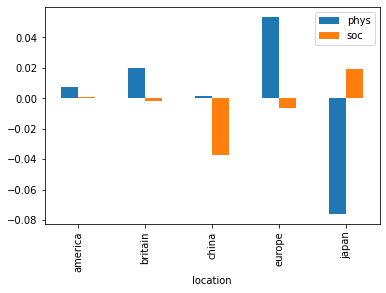

In [107]:
compare_byLoc.plot(kind='bar')

In [198]:
phys_byYear.year.value_counts()

2018.0    5
2010.0    5
2020.0    5
2000.0    5
2001.0    5
         ..
1934.0    1
1938.0    1
1949.0    1
1941.0    1
2022.0    1
Name: year, Length: 77, dtype: int64

In [189]:
west_dict = {'america':True,'europe':True,'britain':True,'japan':False,'china':False,'iran':False}

In [200]:
phys_uncertain_wloc['west'] = phys_uncertain_wloc['location'].map(west_dict)
soc_uncertain_wloc['west'] = soc_uncertain_wloc['location'].map(west_dict)

In [225]:
roll = 3

phys_byYear = phys_uncertain_wloc[['west','uncertain','year']].groupby(['west','year']).mean().reset_index()
phys_byYear['uncertain'] = phys_byYear['uncertain'] - phys_byYear.uncertain.mean()
phys_byYear['rollingUncertain'] = phys_byYear['uncertain'].rolling(window=roll).mean()
phys_byYear['topic'] = ['phys']*len(phys_byYear)
soc_byYear = soc_uncertain_wloc[['west','uncertain','year']].groupby(['west','year']).mean().reset_index()
soc_byYear['uncertain'] = soc_byYear['uncertain'] - soc_byYear.uncertain.mean()
soc_byYear['rollingUncertain'] = soc_byYear['uncertain'].rolling(window=roll).mean()
soc_byYear['topic'] = ['soc']*len(soc_byYear)

In [226]:
compare_byYear = pd.concat([phys_byYear, soc_byYear])
compare_byYear = compare_byYear.query('year > 1960')

In [227]:
# compare_byYear = compare_byYear.query('topic == "soc"')

In [250]:
alt.Chart(compare_byYear.query('topic=="soc"')).mark_line(point=alt.OverlayMarkDef()).encode(
    alt.X('year',scale=alt.Scale(zero=False),axis=alt.Axis(title='Year')),
    alt.Y('rollingUncertain',axis=alt.Axis(title='Uncertainty')),
    color=alt.Color('west:O',scale=alt.Scale(scheme='set2'))
).properties(width=600,height=300)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [251]:
alt.Chart(compare_byYear.query('topic=="phys"')).mark_line(point=alt.OverlayMarkDef()).encode(
    alt.X('year',scale=alt.Scale(zero=False),axis=alt.Axis(title='Year')),
    alt.Y('rollingUncertain',axis=alt.Axis(title='Uncertainty')),
    color=alt.Color('west:O',scale=alt.Scale(scheme='set2'))
).properties(width=600,height=300)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


# Rank

In [ ]:
# paper_presented_rank = pd.read_csv("/scratch/midway3/graceshaoy2/paper_presented_rank.csv")

In [ ]:
# paper_presented_rank = paper_presented_rank[["paperid","journalid","seriesid","seriesrank","journalrank"]].set_index('paperid')
# paper_presented_rank.head()

In [ ]:
# df_wrank = pd.merge(phys_fin_wyear, paper_presented_rank, left_index=True, right_index=True, how='left')

In [ ]:
# df_wrank.head()

In [ ]:
# df_wrank.to_csv('/scratch/midway3/graceshaoy2/phys_wrank.csv')

In [3]:
bio_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/bio_wrank.csv')
phys_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/phys_wrank.csv')
ee_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/ee_wrank.csv')

In [4]:
print("bio")
print(str(bio_wrank['seriesrank'].isnull().values.sum() / len(bio_wrank)) + " series null")
print(str(bio_wrank['journalrank'].isnull().values.sum() / len(bio_wrank)) + " journal null")
print("phys")
print(str(phys_wrank['seriesrank'].isnull().values.sum() / len(phys_wrank)) + " series null")
print(str(phys_wrank['journalrank'].isnull().values.sum() / len(phys_wrank)) + " journal null")
print("ee")
print(str(ee_wrank['seriesrank'].isnull().values.sum() / len(ee_wrank)) + " series null")
print(str(ee_wrank['journalrank'].isnull().values.sum() / len(ee_wrank)) + " journal null")

bio
0.9985753434601913 series null
0.12650156077022195 journal null
phys
0.97080406779022 series null
0.38108759133117454 journal null
ee
0.9080244988310889 series null
0.9013822684327759 journal null


In [5]:
bio_wrank['seriesrank'].isnull().values.sum(), len(bio_wrank)

(4401800, 4408080)

In [6]:
bio_wseries = bio_wrank[~bio_wrank['seriesrank'].isnull()]
bio_wjournal = bio_wrank[~bio_wrank['journalrank'].isnull()]
phys_wseries = phys_wrank[~phys_wrank['seriesrank'].isnull()]
phys_wjournal = phys_wrank[~phys_wrank['journalrank'].isnull()]
ee_wseries = ee_wrank[~ee_wrank['seriesrank'].isnull()]
ee_wjournal = ee_wrank[~ee_wrank['journalrank'].isnull()]

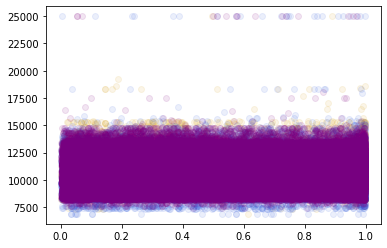

In [7]:
plt.scatter(bio_wseries.uncertain, bio_wseries.seriesrank, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wseries.uncertain, phys_wseries.seriesrank, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wseries.uncertain, ee_wseries.seriesrank, c = "purple", label = "EE", alpha = 0.1)

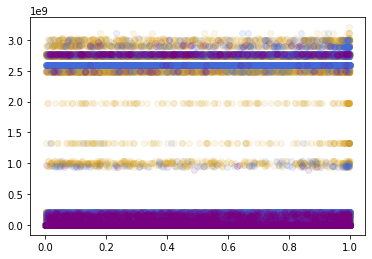

In [8]:
plt.scatter(bio_wjournal.uncertain, bio_wjournal.journalrank, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wjournal.uncertain, phys_wjournal.journalrank, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wjournal.uncertain, ee_wjournal.journalrank, c = "purple", label = "EE", alpha = 0.1)

In [9]:
for cutoff in np.arange(1950,2020,10):
    for df in [bio_wjournal, bio_wseries, phys_wjournal, phys_wseries, ee_wjournal, ee_wseries]:
        after_df = df.query('year >= @cutoff')
        #*!

In [8]:
# print("##### journal #####")
# df = bio_wjournal
# for cutoff in np.arange(1950, 2020, 10):
#     late_journal = df.query('year >= @cutoff')
#     print('cutoff =', cutoff)
#     print('len:', len(late_journal))
#     print('spearmanr:', "corr", spearmanr(df.uncertain, df.journalrank)[0:])
#     print('pearsonr:', "corr", pearsonr(df.uncertain, df.journalrank))
#     print('----')
# print("##### series #####")
# df = bio_wseries
# for cutoff in np.arange(1950, 2020, 10):
#     late_series = df.query('year >= @cutoff')
#     print('cutoff =', cutoff)
#     print('len:', len(late_series))
#     print('spearmanr:', "corr", spearmanr(df.uncertain, df.seriesrank)[0:])
#     print('pearsonr:', "corr", pearsonr(df.uncertain, df.seriesrank))
#     print('----')

# Citation Count

In [232]:
paper_citations = pd.read_csv("paper_citations.csv")

In [4]:
# paper_citations = paper_citations[["pid","citation_count"]].rename(columns = {"pid":"paperid"}).set_index("paperid")
paper_citations.head()

,paperid,citation_count
0,248996,4.0
1,2906390199,0.0
2,760496,2.0
3,1727602,0.0
4,2401921836,7.0


In [12]:
df_wcitation = pd.merge(phys_fin_wyear, paper_citations, left_index=True, right_index=True, how='left')

In [10]:
print(str(df_wcitation['citation_count'].isnull().values.sum())\
      + " null citation counts out of " + str(len(df_wcitation)))

4290990 null citation counts out of 4408080


In [13]:
df_wcitation.to_csv('phys_wcitation.csv')

In [233]:
bio_wcitation = pd.read_csv("bio_wcitation.csv").rename(columns = {"Unnamed: 0":"paperid"})
phys_wcitation = pd.read_csv("phys_wcitation.csv").set_index("Unnamed: 0").rename(columns = {"Unnamed: 0":"paperid"})
ee_wcitation = pd.read_csv("ee_wcitation.csv").set_index("Unnamed: 0").rename(columns = {"Unnamed: 0":"paperid"})

### for specific year

#### 2000

In [234]:
bio2000 = bio_wcitation.query('year==2000').query('citation_count > 10')
phys2000 = phys_wcitation.query('year==2000').query('citation_count > 10')
ee2000 = ee_wcitation.query('year==2000').query('citation_count > 10')

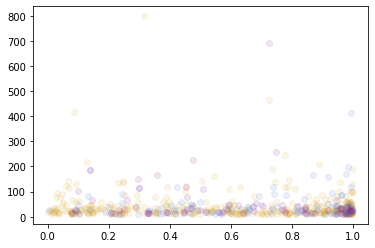

In [235]:
plt.scatter(bio2000.uncertain, bio2000.citation_count, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys2000.uncertain, phys2000.citation_count, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee2000.uncertain, ee2000.citation_count, c = "purple", label = "EE", alpha = 0.1)

In [236]:
bio2000 = bio2000.dropna()
spearmanr(bio2000.uncertain, bio2000.citation_count), pearsonr(bio2000.uncertain, bio2000.citation_count)

(SpearmanrResult(correlation=-0.019310100893729115, pvalue=0.7112223613615325),
 (-0.04101133519398417, 0.4315567622754433))

In [237]:
phys2000 = phys2000.dropna()
spearmanr(phys2000.uncertain, phys2000.citation_count), pearsonr(phys2000.uncertain, phys2000.citation_count)

(SpearmanrResult(correlation=0.07207935294196877, pvalue=0.4542714677132458),
 (0.11535082234826045, 0.23013945722950901))

In [49]:
ee2000 = ee2000.dropna()
spearmanr(ee2000.uncertain, ee2000.citation_count), pearsonr(ee2000.uncertain, ee2000.citation_count)

(SpearmanrResult(correlation=-0.07652155250963397, pvalue=0.522900444715455),
 (-0.06820231543023353, 0.5691858480665137))

#### 2010

In [238]:
bio2010 = bio_wcitation.query('year==2010')#.query('citation_count > 10')
phys2010 = phys_wcitation.query('year==2010')#.query('citation_count > 10')
ee2010 = ee_wcitation.query('year==2010')#.query('citation_count > 20')

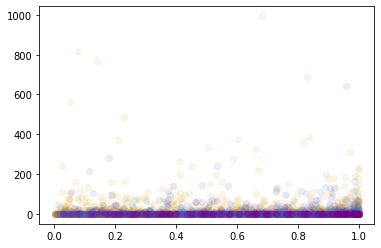

In [239]:
plt.scatter(bio2010.uncertain, bio2010.citation_count, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys2010.uncertain, phys2010.citation_count, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee2010.uncertain, ee2010.citation_count, c = "purple", label = "EE", alpha = 0.1)

In [52]:
bio2010 = bio2010.dropna()
spearmanr(bio2010.uncertain, bio2010.citation_count), pearsonr(bio2010.uncertain, bio2010.citation_count)

(SpearmanrResult(correlation=-0.05883498204355932, pvalue=0.16902659667995026),
 (-0.06292128759883646, 0.14127918488837118))

In [53]:
phys2010 = phys2010.dropna()
spearmanr(phys2010.uncertain, phys2010.citation_count), pearsonr(phys2010.uncertain, phys2010.citation_count)

(SpearmanrResult(correlation=-0.014211820694059305, pvalue=0.8389438731037511),
 (0.028673247643000478, 0.6817161394819814))

In [59]:
ee2010 = ee2010.dropna()
spearmanr(ee2010.uncertain, ee2010.citation_count), pearsonr(ee2010.uncertain, ee2010.citation_count)

(SpearmanrResult(correlation=0.08960853535594127, pvalue=0.7071434343696892),
 (-0.12455158727096344, 0.6008414705519087))

### uncertainty vs. cc might not show anything bc cc more related to the year

In [ ]:
plt.scatter(bio2000.uncertainty)

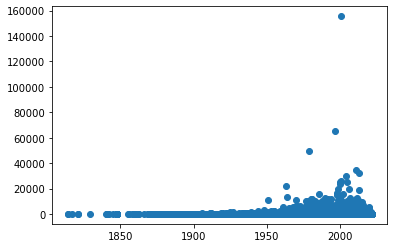

In [6]:
plt.scatter(bio_wcitation.year, bio_wcitation.citation_count)
# uncertainty vs. cc might not show anything bc cc more related to the year

In [240]:
bio_cc_dict = bio_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']
phys_cc_dict = phys_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']
ee_cc_dict = ee_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']

# bio_cc_dict

In [36]:
def cc_prop(df, cc_dict):
    res = []
    for i in df.index:
        if cc_dict[df.year[i]] == 0:
            res.append(0)
        else:
            res.append(df.citation_count[i]/cc_dict[df.year[i]])
    return res

In [30]:
bio_wcitation.sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
4406677,2981649924,0.245042,2020,NaN,NaN
4406688,2981652790,0.191188,2019,NaN,NaN
4406748,2981666593,0.790390,2019,NaN,NaN
4407992,3156789756,0.890433,2021,NaN,NaN


In [37]:
bio_wcitation["prop_cc"] = cc_prop(bio_wcitation, bio_cc_dict)
phys_wcitation["prop_cc"] = cc_prop(phys_wcitation, phys_cc_dict)
ee_wcitation["prop_cc"] = cc_prop(ee_wcitation, ee_cc_dict)

bio_wcitation.sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
4406677,2981649924,0.245042,2020,NaN,NaN
4406688,2981652790,0.191188,2019,NaN,NaN
4406748,2981666593,0.790390,2019,NaN,NaN
4407992,3156789756,0.890433,2021,NaN,NaN


In [38]:
bio_wcitation.dropna().sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
1181360,1988317992,0.975416,1840,11.0,1.0
3384912,2006420098,0.993821,1842,2.0,1.0
937323,2143990523,0.921640,1821,3.0,1.0
2601511,2467115401,0.984629,1872,1.0,1.0


### visualizing

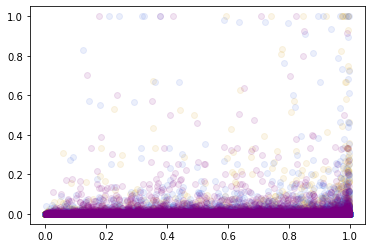

In [39]:
plt.scatter(bio_wcitation.uncertain, bio_wcitation.prop_cc, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wcitation.uncertain, phys_wcitation.prop_cc, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wcitation.uncertain, ee_wcitation.prop_cc, c = "purple", label = "EE", alpha = 0.1)

In [31]:
bio_wcitation = bio_wcitation.dropna()

In [37]:
spearmanr(bio_wcitation.uncertain, bio_wcitation.prop_cc)

SpearmanrResult(correlation=0.0005240653080555313, pvalue=0.27182684836807386)

In [11]:
top_bio_cc = bio_wcitation.query("citation_count > 100")
top_phys_cc = phys_wcitation.query("citation_count > 100")
top_ee_cc = ee_wcitation.query("citation_count > 100")

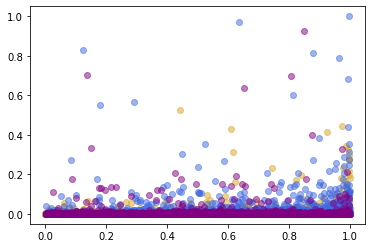

In [12]:
plt.scatter(top_bio_cc.uncertain, top_bio_cc.prop_cc, c = "goldenrod", label = "Biology", alpha = 0.5)
plt.scatter(top_phys_cc.uncertain, top_phys_cc.prop_cc, c = "royalblue", label = "Physics", alpha = 0.5)
plt.scatter(top_ee_cc.uncertain, top_ee_cc.prop_cc, c = "purple", label = "EE", alpha = 0.5)
# *! feel like citation counts aren't linear, hit a breakthrough point -- whether hit that or not related to uncertainty?

In [36]:
top_bio_cc = top_bio_cc.dropna()
spearmanr(top_bio_cc.uncertain, top_bio_cc.porp_cc)

SpearmanrResult(correlation=0.062219469284043864, pvalue=2.7830766374540446e-298)